# Predicting Passenger Satisfaction based on Airline Features

The goal of this notebook is to explore the Airline Passenger Satisfaction survey data and analyze which features are strong predictors of passenger satisfaction. This analysis can be leveraged by the airline company to identify which services or features are most pertinent to a passenger and how they can leveraged to attract additional customer or improve customer ratings.
Dataset link - https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

## STEP 1 - Load the raw dataset and perform preliminary review

In [153]:
# Import relevant libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Load the train csv file
airline_data = pd.read_csv("train.csv")

In [155]:
# Review sample raw data and dimensions
airline_data.head()
# The first 2 columns are serial numbers and unique identifiers, thus they will be removed

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [156]:
airline_data.shape

(103904, 25)

In [157]:
airline_data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [158]:
# Dropping first 2 columns
airline_data = airline_data.drop(['Unnamed: 0','id' ], axis=1)

In [159]:
airline_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [160]:
# Assessing data types of the features
airline_data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [161]:
# Checking to see if the dataset has any missing values
airline_data.isna().sum()
# There are 310 missing values for the Arrival Delay in Minutes variable. We can imput these values before building
# the model. 


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

## STEP 2 - Perform Exploratory Data Analysis on the dataset

In [162]:
# Analyzing categorical variables
cat_var = airline_data.select_dtypes(include = 'object')
cat_var

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [163]:
# Seeing unique values for our categorical variables
for var in cat_var:
    print(airline_data[var].value_counts())
    print()

Female    52727
Male      51177
Name: Gender, dtype: int64

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64



The above analysis of categorical varaibles has revealed some interesting facts from the dataset:
- There are roughly equal number of male and female participants in the dataset
- Majority of the customers are loyal, business travelers who usually travel in either Business or Economy class
- Economy plus looks to be an underutilized travel class which indicates the potential for better marketing 
- Over 50% of the passengers have a satisfaction level of neutral or dissastisfied despite being loyal

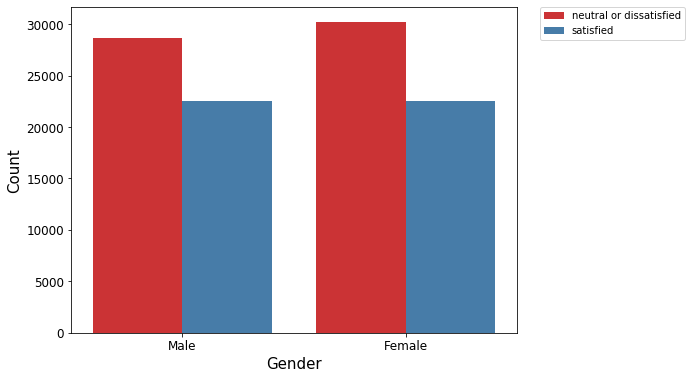

In [164]:
# Passenger satisfaction across gender
fig, ax = plt.subplots( figsize=(8, 6))
ax =sns.countplot(x='Gender', data=airline_data, hue='satisfaction',  palette = "Set1")
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

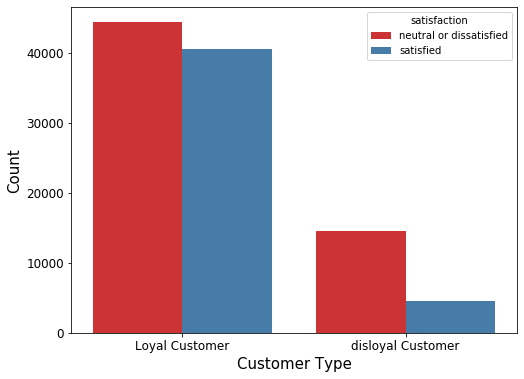

In [165]:
# Passenger satisfaction across customer type
fig, ax = plt.subplots( figsize=(8, 6))
ax =sns.countplot(x='Customer Type', data=airline_data, hue='satisfaction', palette = 'Set1')
ax.set_xlabel("Customer Type",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

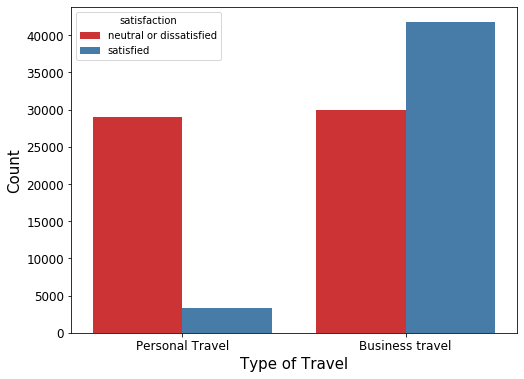

In [166]:
# Passenger satisfaction across type of travel
fig, ax = plt.subplots( figsize=(8, 6))
ax =sns.countplot(x='Type of Travel', data=airline_data, hue='satisfaction',palette ='Set1')
ax.set_xlabel("Type of Travel",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

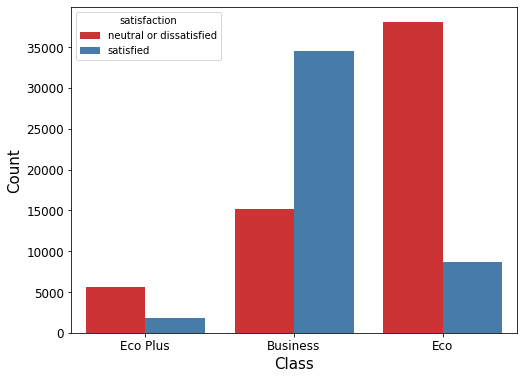

In [167]:
# Passenger satisfaction across travel class
fig, ax = plt.subplots( figsize=(8, 6))
ax =sns.countplot(x='Class', data=airline_data, hue='satisfaction',palette='Set1')
ax.set_xlabel("Class",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can conclude from the plots above that majority of the loyal and disloyal customers within the dataset have a neutral or dissatisfied rating for the airline. Moreover, we observe that business travel passengers as well as business class passengers are highly satisfied signaling the need to improve the Economy travel services.

In [168]:
# Analyzing numerical variables
airline_data.describe().T
# The average age of a passenger is 39 years
# Average flight distance ranges widely indicating that the airline operates short as well as long distance flights

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


There are several features in this dataset which are ordinal in nature. These are responses to the airline's features on a scale from 1 to 5 (assuming 1 being lowest and 5 being highest). Please note that there are ratings which are 0 which stand for not applicable. 
From the averages above, we see that most ratings within this dataset are sligthly above 3. The 'Inflight wifi service' and 
'Ease of Online booking' are the lowest rated features. As majority of the travelers are business oriented, the airline should focus on improving wifi services.

## STEP 3 - Preprocess the dataset prior to the modeling

In [169]:
# Address missing value in the Arrival Delay in Minutes feature
airline_data.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
satisfaction                         False
dtype: bool

In [170]:
# Imputed Arrival Delay in Minutes column using median
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
  
# Imputer object using the median strategy and missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='median')

# Fitting the data to the imputer object
imputer = imputer.fit(airline_data[['Arrival Delay in Minutes']])

# Imputing the data 
airline_data['Arrival Delay in Minutes']= imputer.transform(airline_data[['Arrival Delay in Minutes']])

In [171]:
airline_data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [172]:
# Converting target variable from categorical to numerical
airline_data['satisfaction'] = airline_data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [173]:
# Checking conversion was done correctly
airline_data['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [174]:
# Converting predictor variables from categorical to binary using dummies value approach

# Performing one hot encoding for Fuel Type
category = ['Gender','Customer Type','Type of Travel','Class']
for column in category:
    tempdf = pd.get_dummies(airline_data[column], prefix=column)
    airline_data = pd.merge(
        left=airline_data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    airline_data = airline_data.drop(columns=column)

In [175]:
airline_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,1,0,1,0,1,0,0


## STEP 4 - Build the Models

In [176]:
airline_data.shape

(103904, 28)

In [177]:
# The first model we are using is Logistic Regression. We chose this model as it is fast, explainable and efficient for
# binary classification.

# Create a df for all the predictor variables
airline_data_c = airline_data.copy()
X = airline_data_c.drop('satisfaction', axis=1)
print(X.shape)
X.head()

(103904, 27)


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,18.0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,6.0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,9.0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0.0,0,1,1,0,1,0,1,0,0


In [178]:
type(X)

pandas.core.frame.DataFrame

In [179]:
# Create a dataframe for just the target variable
Y = airline_data_c['satisfaction']

In [180]:
Y.shape


(103904,)

In [181]:
# import the module
from sklearn.linear_model import LogisticRegression

# Create model instance 
log_reg_mod = LogisticRegression()

# Fit the model on given data
log_reg_mod.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [182]:
# Load the test data
test = pd.read_csv('test.csv')

In [183]:
test.shape

(25976, 25)

In [184]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [185]:
# Apply all preprocessing steps used for training data ont the test data
# Dropping first 2 columns
test = test.drop(['Unnamed: 0','id' ], axis=1)

In [186]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [187]:
# Checking to see if the dataset has any missing values
test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [188]:
test['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [189]:
# Imputed Arrival Delay in Minutes column using median
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
  
# Imputer object using the median strategy and missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='median')

# Fitting the data to the imputer object
imputer = imputer.fit(test[['Arrival Delay in Minutes']])

# Imputing the data
test['Arrival Delay in Minutes']= imputer.transform(test[['Arrival Delay in Minutes']])

In [190]:
# Verifying there are no missing values in the test data
test.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [191]:
# Converting target variable from categorical to binary
test['satisfaction'] = test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [192]:
test['satisfaction'].value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

In [193]:
# Converting predictor variables from categorical to binary using dummies value approach

# Performing one hot encoding for Fuel Type
category = ['Gender','Customer Type','Type of Travel','Class']
for column in category:
    tempdf = pd.get_dummies(test[column], prefix=column)
    test = pd.merge(
        left=test,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    test = test.drop(columns=column)

In [194]:
test.tail()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
25971,34,526,3,3,3,1,4,3,4,4,...,0,0,1,0,1,1,0,1,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,1,0,1,1,0,1,0,1,0,0
25973,17,828,2,5,1,5,2,1,2,2,...,0,1,0,1,0,0,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,1,0,1,1,0,1,0,1,0,0
25975,42,264,2,5,2,5,4,2,2,1,...,0,1,0,1,0,0,1,0,1,0


In [195]:
X_test = test.drop('satisfaction', axis=1)

In [196]:
X_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,44.0,1,0,1,0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,0.0,1,0,1,0,1,0,1,0,0
2,20,192,2,0,2,4,2,2,2,2,...,0.0,0,1,0,1,1,0,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,6.0,0,1,1,0,1,0,1,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,20.0,1,0,1,0,1,0,0,1,0


In [197]:
Y_test = test['satisfaction']

In [198]:
# Predicting Y or target variable values on for the test data using the logistric regression model
y_pred= log_reg_mod.predict(X_test)

In [199]:
# Comparing model predictions to actual test data values
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[12216,  2357],
       [ 2044,  9359]], dtype=int64)

Text(0.5, 384.16, 'Predicted label')

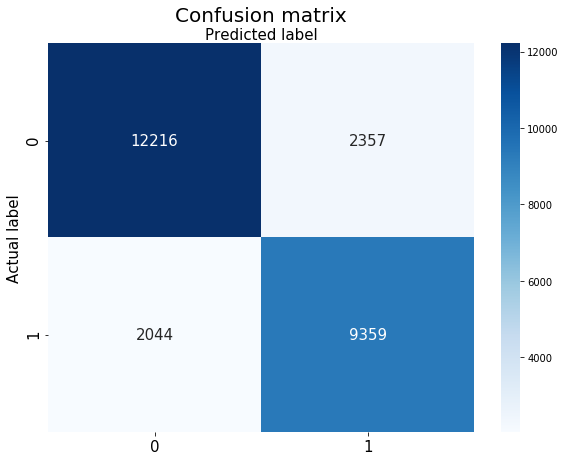

In [200]:
#Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize = (8,6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize = 15)
plt.yticks(tick_marks, class_names, fontsize = 15)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', fontsize = 20)
plt.ylabel('Actual label', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 15)

In [201]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("F Score:",metrics.f1_score(Y_test, y_pred))

Accuracy: 0.8305743763473976
Precision: 0.7988221235916695
Recall: 0.8207489257213014
F Score: 0.8096370950300619


The Logistic Regression model has yielded an Accuracy, Precision, Recall and F Measure of close to 80% which indicates that this is a good model to predict if a passenger is satisfied or dissatisfied with the airline based on the airline features.

In [202]:
# Next we apply the Naive Bayes model on the dataset as it is fast and works well with large datasets.

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(X,Y)

GaussianNB()

In [203]:
# Predicting Y or target variable values on for the test data using the logistric regression model
y_pred_nb= model_nb.predict(X_test)

In [204]:
# Comparing model predictions to actual test data values
from sklearn import metrics
cnf_matrix_nb = metrics.confusion_matrix(Y_test, y_pred_nb)
cnf_matrix_nb

array([[12662,  1911],
       [ 2134,  9269]], dtype=int64)

Text(0.5, 384.16, 'Predicted label')

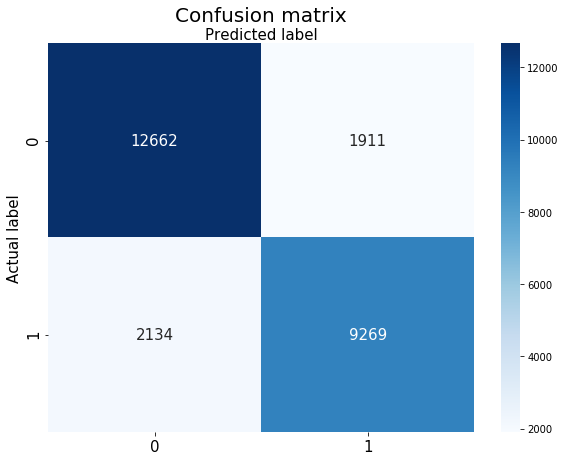

In [205]:
#Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize = (8,6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize = 15)
plt.yticks(tick_marks, class_names, fontsize = 15)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nb), annot=True, cmap="Blues" ,fmt='g', annot_kws={"size": 15})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', fontsize = 20)
plt.ylabel('Actual label', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 15)

In [206]:
print("Accuracy NB:",metrics.accuracy_score(Y_test, y_pred))
print("Precision NB:",metrics.precision_score(Y_test, y_pred))
print("Recall NB:",metrics.recall_score(Y_test, y_pred))
print("F Score NB:",metrics.f1_score(Y_test, y_pred))

Accuracy NB: 0.8305743763473976
Precision NB: 0.7988221235916695
Recall NB: 0.8207489257213014
F Score NB: 0.8096370950300619


The Naive Bayes model also gets similar accuracy score and does not lead to significant improvements.

## STEP 5 - Extract Feature Important

In [207]:
# Get feature importance from the Logistic Regression model
importance = log_reg_mod.coef_[0]
importance

array([-2.23734172e-02, -2.83106521e-04,  3.12297541e-01, -9.08059364e-02,
       -2.43506626e-01, -1.87500357e-01, -4.11647904e-01,  5.61487773e-01,
        1.93134926e-02,  6.08589535e-01,  2.94438058e-01,  1.29041408e-01,
       -1.75600088e-01,  1.02259943e-01, -2.34803497e-01, -1.90014636e-02,
        4.64293689e-04, -7.54757284e-03, -3.68807198e-01, -2.50708820e-01,
        8.18184622e-02, -7.01334481e-01,  4.42281295e-01, -1.06179731e+00,
        7.60852026e-01, -1.18634429e+00, -1.94023758e-01])

In [208]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# The positive scores indicate a feature that predicts class 1, 
# whereas the negative scores indicate a feature that predicts class 0.

Feature: 0, Score: -0.02237
Feature: 1, Score: -0.00028
Feature: 2, Score: 0.31230
Feature: 3, Score: -0.09081
Feature: 4, Score: -0.24351
Feature: 5, Score: -0.18750
Feature: 6, Score: -0.41165
Feature: 7, Score: 0.56149
Feature: 8, Score: 0.01931
Feature: 9, Score: 0.60859
Feature: 10, Score: 0.29444
Feature: 11, Score: 0.12904
Feature: 12, Score: -0.17560
Feature: 13, Score: 0.10226
Feature: 14, Score: -0.23480
Feature: 15, Score: -0.01900
Feature: 16, Score: 0.00046
Feature: 17, Score: -0.00755
Feature: 18, Score: -0.36881
Feature: 19, Score: -0.25071
Feature: 20, Score: 0.08182
Feature: 21, Score: -0.70133
Feature: 22, Score: 0.44228
Feature: 23, Score: -1.06180
Feature: 24, Score: 0.76085
Feature: 25, Score: -1.18634
Feature: 26, Score: -0.19402


In [209]:
for col in X.columns:
    print(col)

Age
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
Gender_Female
Gender_Male
Customer Type_Loyal Customer
Customer Type_disloyal Customer
Type of Travel_Business travel
Type of Travel_Personal Travel
Class_Business
Class_Eco
Class_Eco Plus


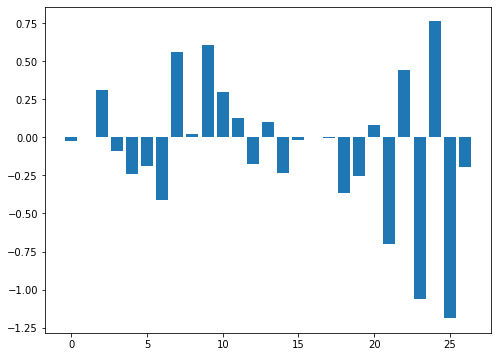

In [210]:
# plot feature importance
fig, ax = plt.subplots(figsize = (8,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From the graph above, we observe that features that predict a class of 1, that is, if a pasenger is satisfied are:
- Feature 2 = Inflight wifi service, 7= Online boarding, 9 = Inflight entertainment, 10 = On-board service, 22 = Type of Travel_Business travel, and 24 = Class_Business respectively.

On the other hand, we observe that features that predict a class of 0, that is, if a pasenger is dissatisfied or neutral are:
- Feature 4 = Ease of Online booking , 6 = Food and drink , 14 = Inflight service, 18 = Gender_Female, 19 = Gender_Male, 21 = Customer Type_disloyal Customer , 23 = Type of Travel_Personal Travel , and 25 = Class_Eco respectively.

While some of these features may be difficult to be controlled by the airline itself, other features which focus around the inflight, booking and onboarding experiences can be enhanced or improved to increase customer satisfaction and retention.